<a href="https://colab.research.google.com/github/Thierry-Celestin/RecommendationApp/blob/main/exam_adu_mark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ## Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report, accuracy_score



In [ ]:
# Step 2: Load Dataset
from google.colab import files
uploaded = files.upload()  # Upload emotions_dataset.csv file
file_path = list(uploaded.keys())[0]
data = pd.read_csv(file_path)

Saving emotions_dataset.csv to emotions_dataset (1).csv


Dataset Head:
                                                text    label
0      i just feel really helpless and heavy hearted     fear
1  ive enjoyed being able to slouch about relax a...  sadness
2  i gave up my internship with the dmrg and am f...     fear
3                         i dont know i feel so lost  sadness
4  i am a kindergarten teacher and i am thoroughl...     fear

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416809 entries, 0 to 416808
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    416809 non-null  object
 1   label   416809 non-null  object
dtypes: object(2)
memory usage: 6.4+ MB

Label Distribution:
label
joy         141067
sadness     121187
anger        57317
fear         47712
love         34554
surprise     14972
Name: count, dtype: int64


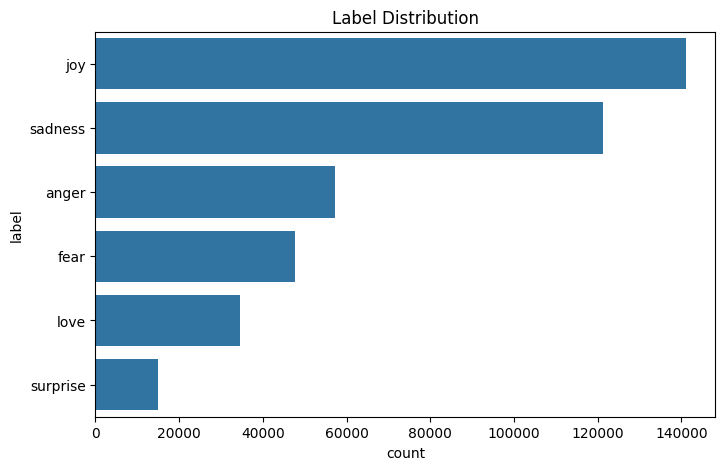

In [ ]:
# Step 3: Data Exploration
print("Dataset Head:")
print(data.head())
print("\nDataset Info:")
data.info()

print("\nLabel Distribution:")
print(data['label'].value_counts())

# Visualize Label Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data['label'], order=data['label'].value_counts().index)
plt.title("Label Distribution")
plt.show()

In [ ]:
# Step 4: Data Preprocessing
# Encode labels
label_encoder = LabelEncoder()
data['encoded_label'] = label_encoder.fit_transform(data['label'])

# Tokenize text data
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(data['text'])
sequences = tokenizer.texts_to_sequences(data['text'])
padded_sequences = pad_sequences(sequences, padding='post', maxlen=100)

# Split data
X = padded_sequences
y = data['encoded_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Step 5: Build Neural Network Model
model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=100),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(32),
    Dense(32, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')  # Number of classes
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Step 6: Train the Model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)


Epoch 1/10
10421/10421 ━━━━━━━━━━━━━━━━━━━━ 1240s 118ms/step - accuracy: 0.3372 - loss: 1.5750 - val_accuracy: 0.3385 - val_loss: 1.5736
Epoch 2/10
10421/10421 ━━━━━━━━━━━━━━━━━━━━ 1296s 120ms/step - accuracy: 0.3354 - loss: 1.5763 - val_accuracy: 0.3385 - val_loss: 1.5730
Epoch 3/10
10421/10421 ━━━━━━━━━━━━━━━━━━━━ 1240s 119ms/step - accuracy: 0.3381 - loss: 1.5740 - val_accuracy: 0.3385 - val_loss: 1.5737
Epoch 4/10
10421/10421 ━━━━━━━━━━━━━━━━━━━━ 1263s 121ms/step - accuracy: 0.3383 - loss: 1.5723 - val_accuracy: 0.3385 - val_loss: 1.5732
Epoch 5/10
10421/10421 ━━━━━━━━━━━━━━━━━━━━ 1247s 120ms/step - accuracy: 0.3400 - loss: 1.5712 - val_accuracy: 0.3385 - val_loss: 1.5739
Epoch 6/10
10421/10421 ━━━━━━━━━━━━━━━━━━━━ 1252s 120ms/step - accuracy: 0.3392 - loss: 1.5733 - val_accuracy: 0.3385 - val_loss: 1.5738
Epoch 7/10
10421/10421 ━━━━━━━━━━━━━━━━━━━━ 1283s 120ms/step - accuracy: 0.3371 - loss: 1.5746 - val_accuracy: 0.3385 - val_loss: 1.5736
Epoch 8/10
10421/10421 ━━━━━━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [19]:
# Step 7: Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Classification Report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))

2606/2606 ━━━━━━━━━━━━━━━━━━━━ 93s 36ms/step - accuracy: 0.3393 - loss: 1.5730
Test Loss: 1.5728217363357544
Test Accuracy: 0.3384515643119812
2606/2606 ━━━━━━━━━━━━━━━━━━━━ 90s 34ms/step

Classification Report:
              precision    recall  f1-score   support

       anger       0.00      0.00      0.00     11463
        fear       0.00      0.00      0.00      9542
         joy       0.34      1.00      0.51     28214
        love       0.00      0.00      0.00      6911
     sadness       0.00      0.00      0.00     24238
    surprise       0.00      0.00      0.00      2994

    accuracy                           0.34     83362
   macro avg       0.06      0.17      0.08     83362
weighted avg       0.11      0.34      0.17     83362



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


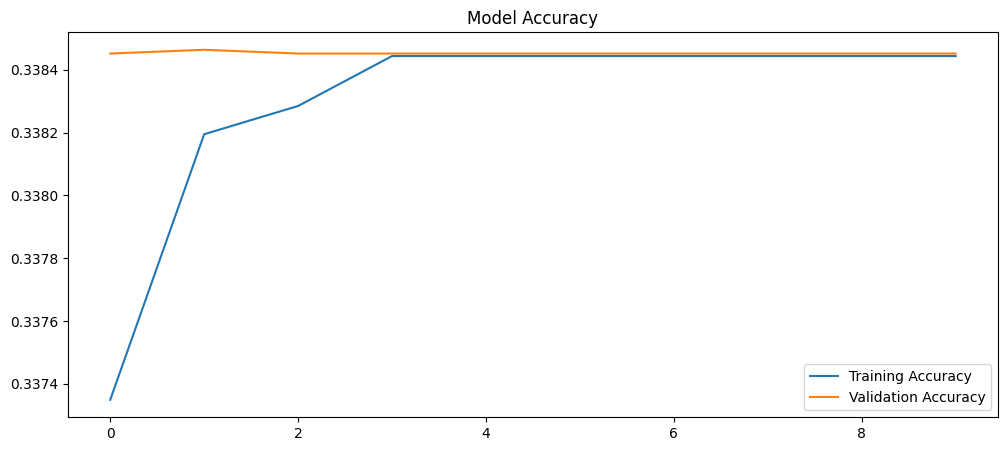

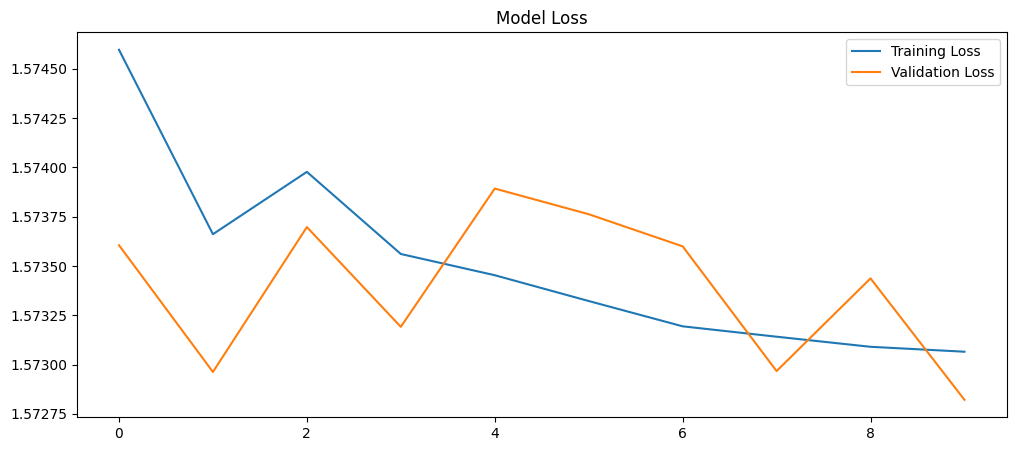

In [20]:
# Step 8: Visualize Training History
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy")
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Model Loss")
plt.show()

In [24]:
# Step 9: Save and Download the Report
!pip install fpdf  # Install the fpdf library if not already installed
from fpdf import FPDF

# Create the Report
report = FPDF()
report.add_page()
report.set_font("Arial", size=12)
report.cell(200, 10, txt="Emotions Prediction Report", ln=True, align='C')

# Add Report Content
# ... (rest of your code) ...

  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=8130677335da9d442c10f040b044cabf6ea035599bfa9affc53d147e96b1ba42
  Stored in directory: /root/.cache/pip/wheels/65/4f/66/bbda9866da446a72e206d6484cd97381cbc7859a7068541c36
Successfully built fpdf


In [25]:
# Save the Report Locally
exam_adu_mark = r"C:\Users\macke\Desktop\EPITA LESSONS\2sem\Deep Learning & Neural Networks in Python\Exams_emotions\exam_emotions_report.pdf"
report.output(exam_adu_mark)

print(f"Report saved to: {exam_adu_mark}")

Report saved to: C:\Users\macke\Desktop\EPITA LESSONS\2sem\Deep Learning & Neural Networks in Python\Exams_emotions\exam_emotions_report.pdf
